In [11]:
import numpy as np
import matplotlib.pyplot as plt

from kdelearn.kde import KDE
# from kdelearn.kde_funcs import KDEOutliersDetector
from kdelearn.bandwidth_selection import normal_reference, direct_plugin

Przy

nasileniu szumu a=0.0, 0.1, 0.2, 0.3, 0.4, 0.5

siatce dla r=0.01, 0.02, ..., 0.5

siatce dla mnożnika h=0.2, 0.4, ..., 10.0

\newpage

# Siatka po r (przy mnożniku h = 1)

In [12]:
def func1(x_train):
    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth)
    scores = kde.pdf(x_train)

    metrics_list = []
    r_list = []
    for r in np.arange(0.01, 0.51, 0.01):
        r = round(r, 3)
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        scores_o = scores[labels_pred==1]
        scores_i = scores[labels_pred==0]
        tmp = int(np.ceil(0.01 * (scores_o.size + scores_i.size)))
        metrics = np.sum(np.sort(scores_o)[-tmp:]) / np.sum(np.sort(scores_i)[:tmp])

        metrics_list.append(metrics)
        r_list.append(r)

    plt.figure(figsize=(5, 3.5))
    plt.plot(r_list, metrics_list, "-o")
    plt.xlabel("r")
    plt.ylabel("PI")
    plt.grid()
    plt.show()

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], r_list[idx])
    
    print(f"r - globalne minimum: {global_min[1]:.3f}, Wskaźnik: {global_min[0]:.3f}")
    print("-"*10)
    
    return global_min, scores

a = 0.0


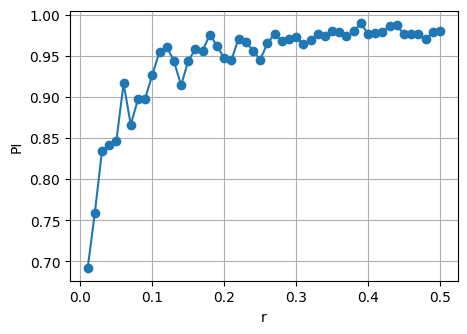

r - globalne minimum: 0.010, Wskaźnik: 0.691
----------


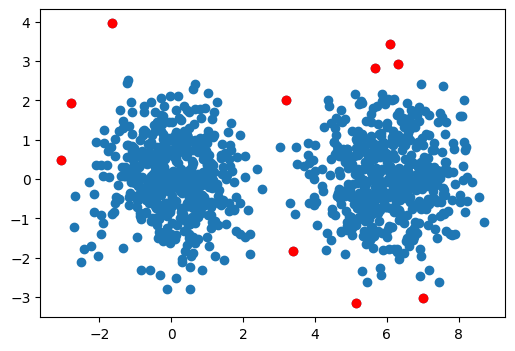

a = 0.1


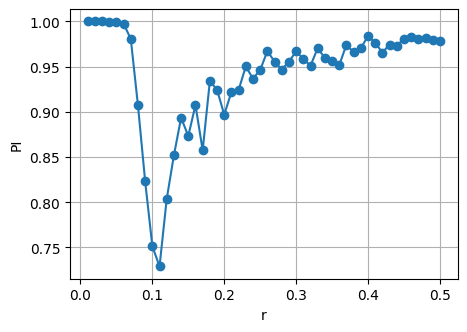

r - globalne minimum: 0.110, Wskaźnik: 0.729
----------


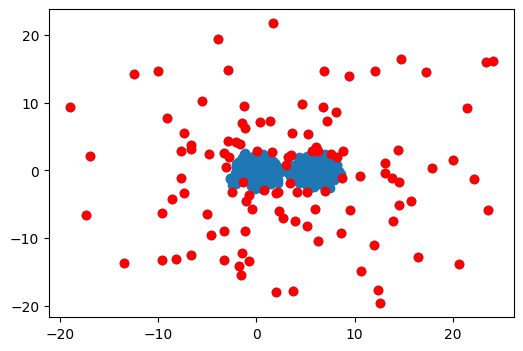

a = 0.2


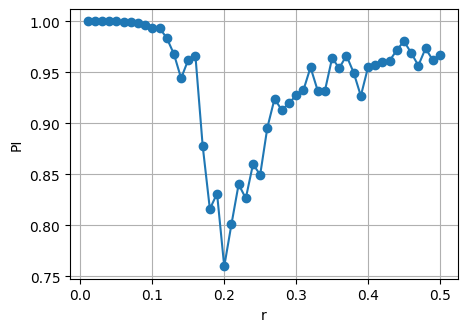

r - globalne minimum: 0.200, Wskaźnik: 0.760
----------


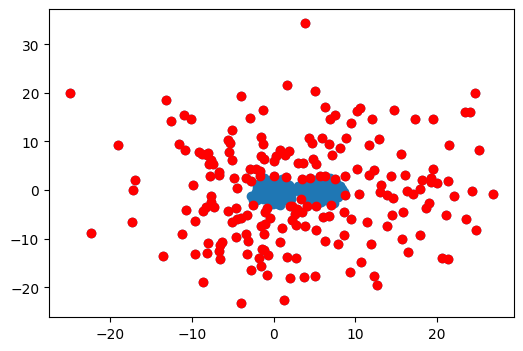

a = 0.3


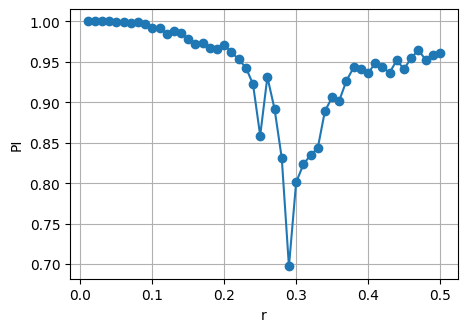

r - globalne minimum: 0.290, Wskaźnik: 0.697
----------


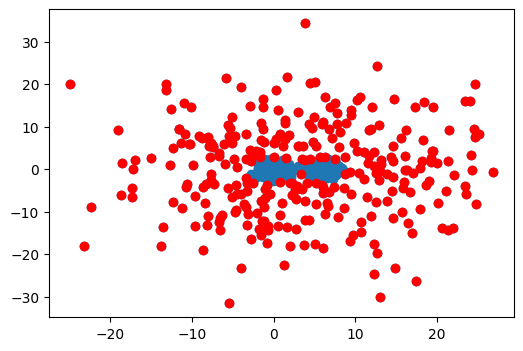

a = 0.4


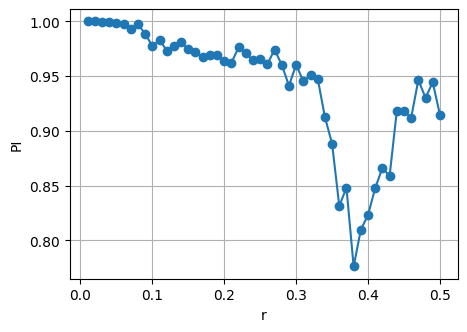

r - globalne minimum: 0.380, Wskaźnik: 0.776
----------


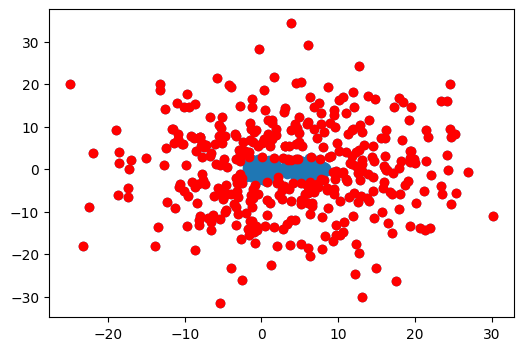

a = 0.5


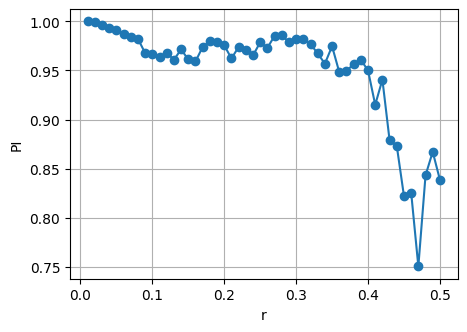

r - globalne minimum: 0.470, Wskaźnik: 0.750
----------


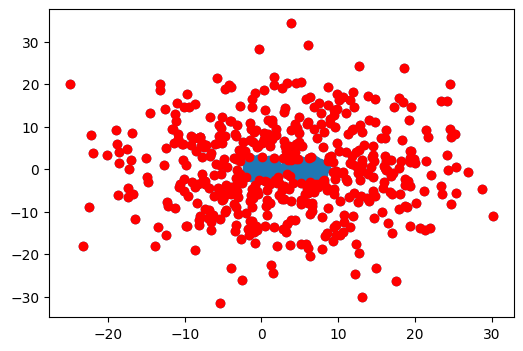

In [13]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))
    
    # Run
    global_min, scores = func1(x_train)
    
    plt.figure(figsize=(6, 4))
    threshold = np.quantile(scores, global_min[1])
    labels_pred = np.where(scores <= threshold, 1, 0)
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
#     plt.xlim(-4, 10)
#     plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.01)

In [14]:
def func2(x_train, r):
    bandwidth = direct_plugin(x_train, stage=2)

    metrics_list = []
    h_mul_list = []
    for h_mul in np.arange(0.2, 10.2, 0.2):
        h_mul = round(h_mul, 3)
        
        kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
        scores = kde.pdf(x_train)
        
        threshold = np.quantile(scores, r)
        labels_pred = np.where(scores <= threshold, 1, 0)

        n_outliers = labels_pred.sum()
        if n_outliers == 0:
            continue

        scores_o = scores[labels_pred==1]
        scores_i = scores[labels_pred==0]
        tmp = int(np.ceil(0.01 * (scores_o.size + scores_i.size)))
        metrics = np.sum(np.sort(scores_o)[-tmp:]) / np.sum(np.sort(scores_i)[:tmp])

        metrics_list.append(metrics)
        h_mul_list.append(h_mul)

    plt.figure(figsize=(5, 3.5))
    plt.plot(h_mul_list, metrics_list, "-o")
    plt.xlabel("h_multiplier")
    plt.ylabel("PI")
    plt.grid()
    plt.show()

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], h_mul_list[idx])
    
    print(f"Najlepszy mnożnik h: {global_min[1]:.3f}, Wskaźnik: {global_min[0]:.3f}")
    print("-"*10)
    
    return global_min, scores

a = 0.0


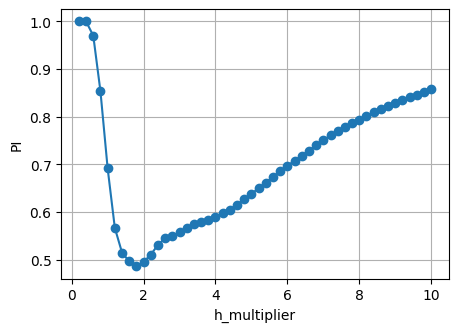

Najlepszy mnożnik h: 1.800, Wskaźnik: 0.486
----------


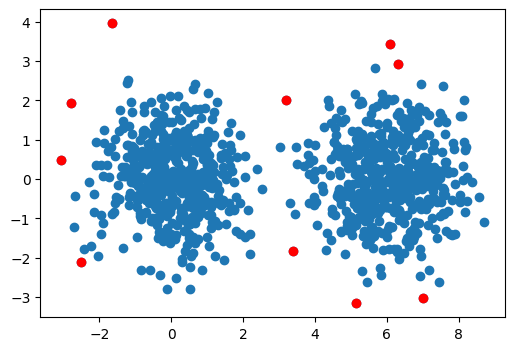

a = 0.1


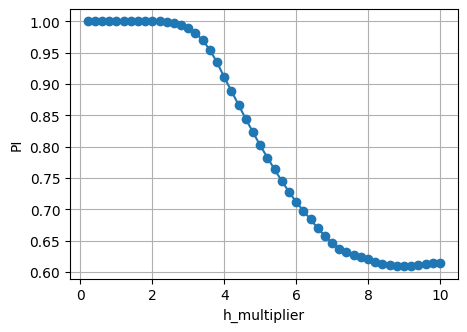

Najlepszy mnożnik h: 9.000, Wskaźnik: 0.609
----------


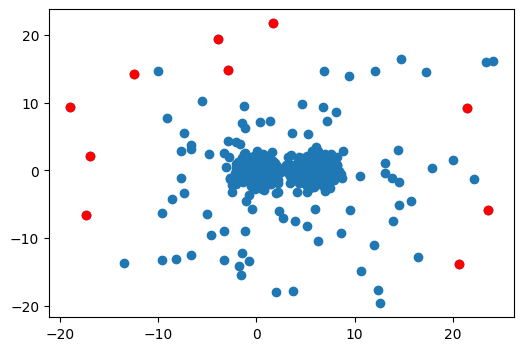

a = 0.2


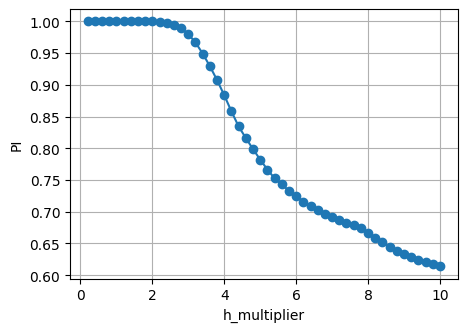

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.614
----------


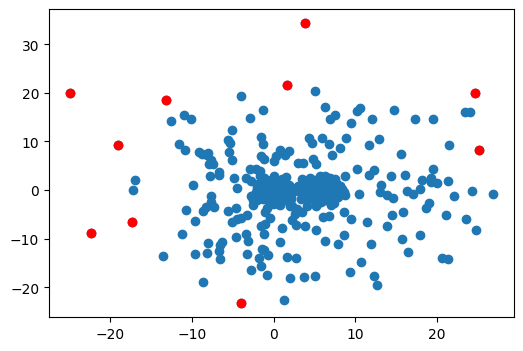

a = 0.3


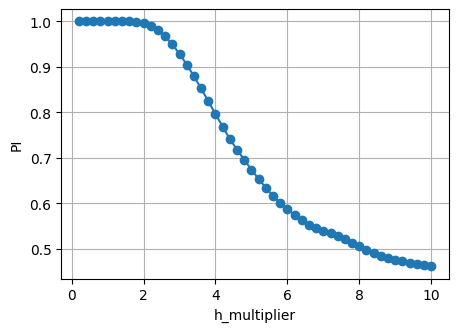

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.461
----------


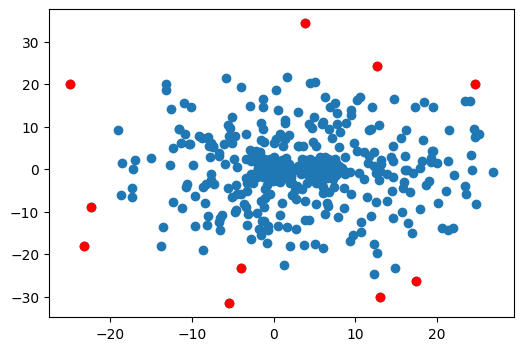

a = 0.4


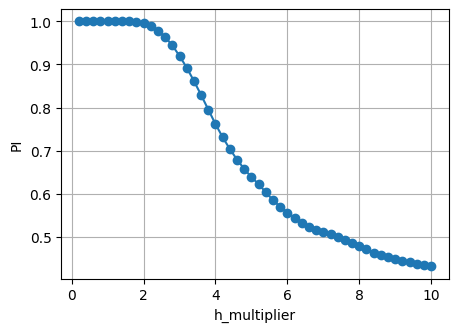

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.432
----------


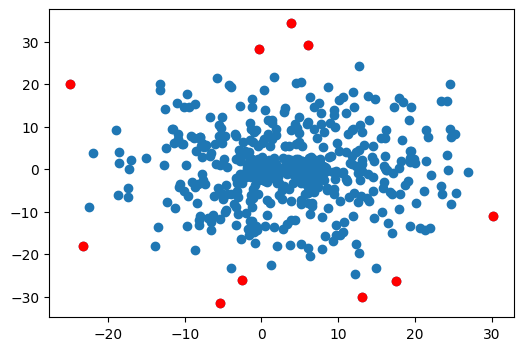

a = 0.5


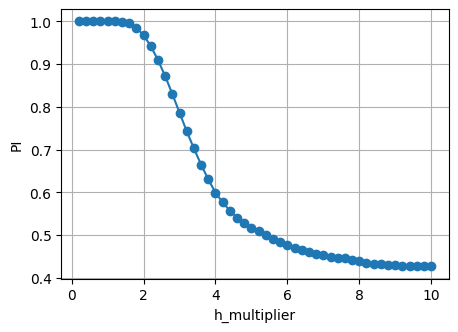

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.427
----------


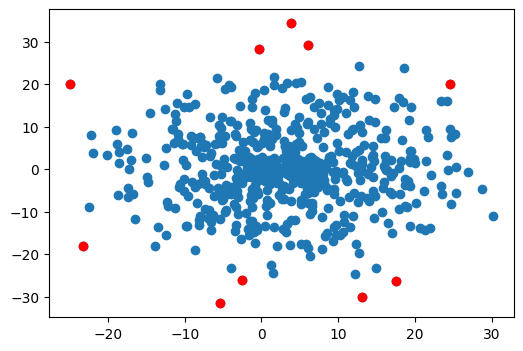

In [15]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.01
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.05)

a = 0.0


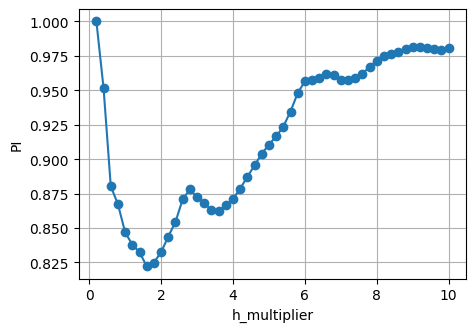

Najlepszy mnożnik h: 1.600, Wskaźnik: 0.822
----------


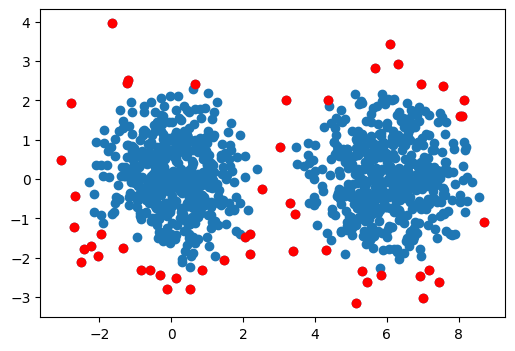

a = 0.1


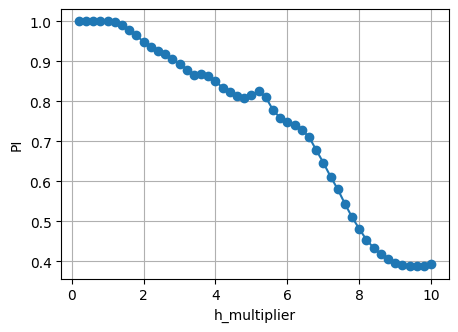

Najlepszy mnożnik h: 9.600, Wskaźnik: 0.388
----------


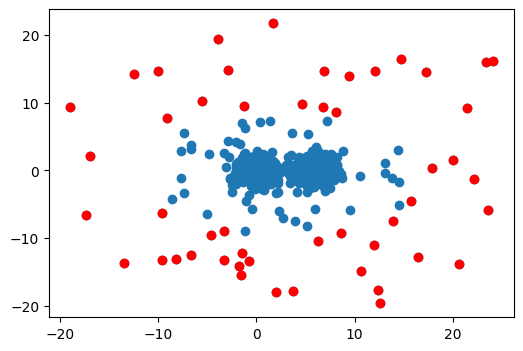

a = 0.2


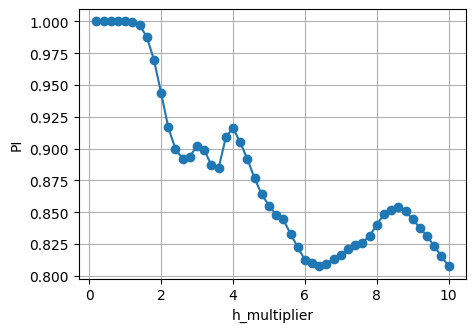

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.807
----------


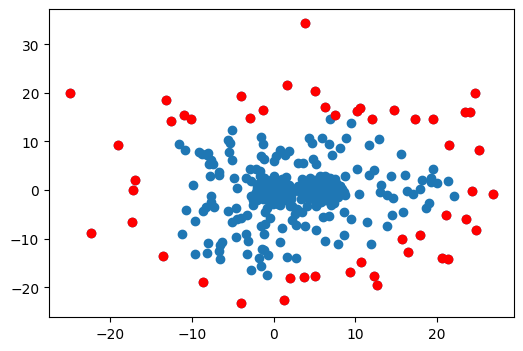

a = 0.3


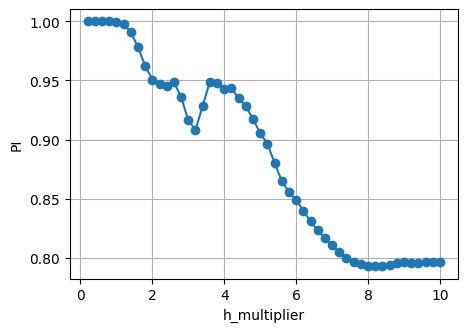

Najlepszy mnożnik h: 8.200, Wskaźnik: 0.793
----------


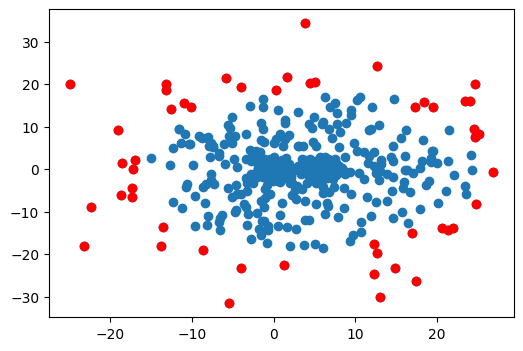

a = 0.4


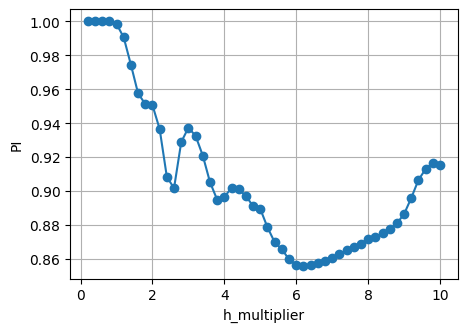

Najlepszy mnożnik h: 6.200, Wskaźnik: 0.856
----------


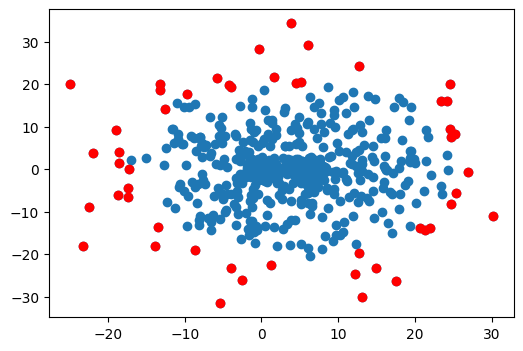

a = 0.5


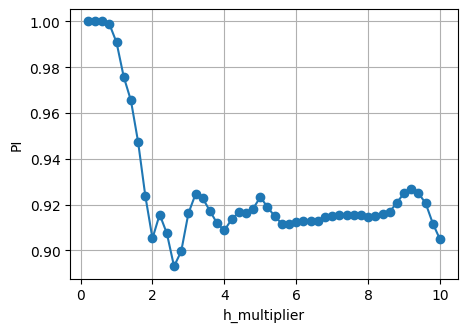

Najlepszy mnożnik h: 2.600, Wskaźnik: 0.893
----------


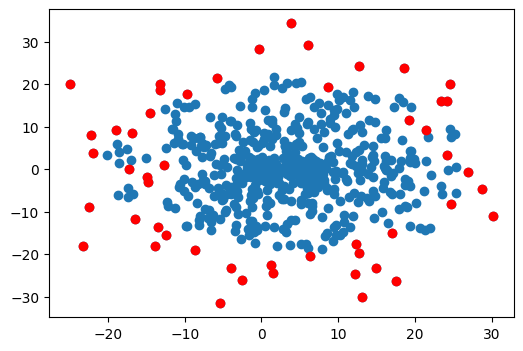

In [16]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.05
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.1)

a = 0.0


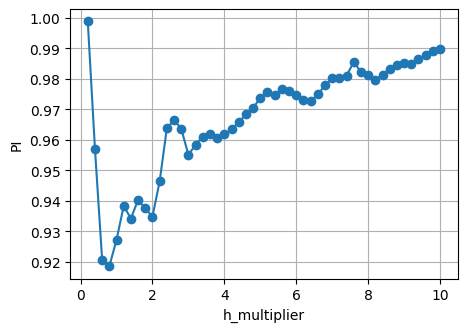

Najlepszy mnożnik h: 0.800, Wskaźnik: 0.918
----------


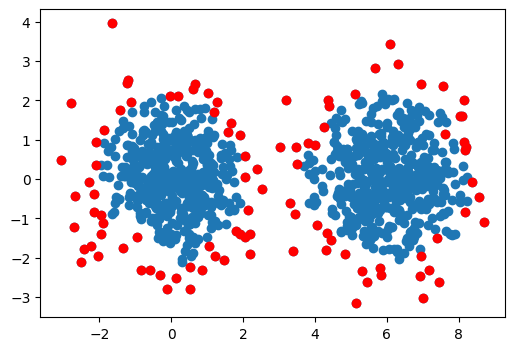

a = 0.1


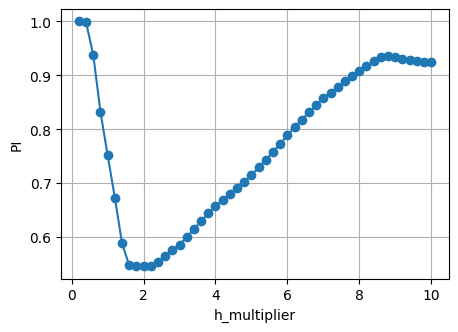

Najlepszy mnożnik h: 1.800, Wskaźnik: 0.545
----------


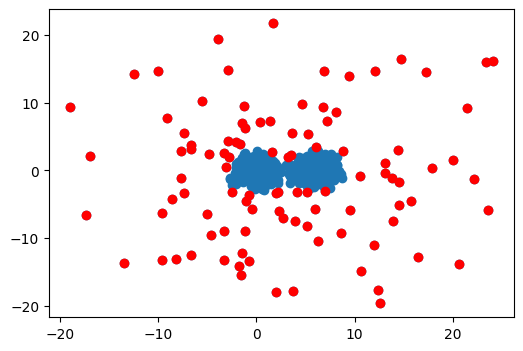

a = 0.2


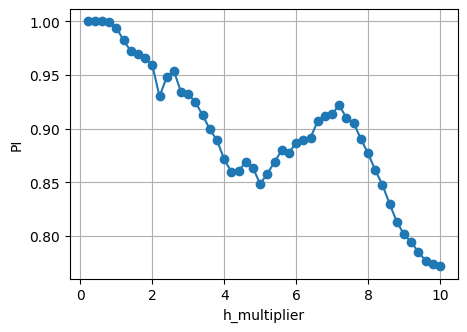

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.771
----------


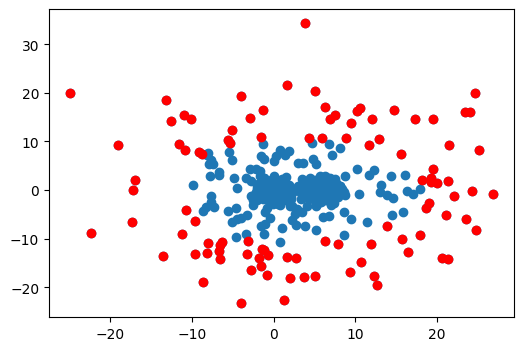

a = 0.3


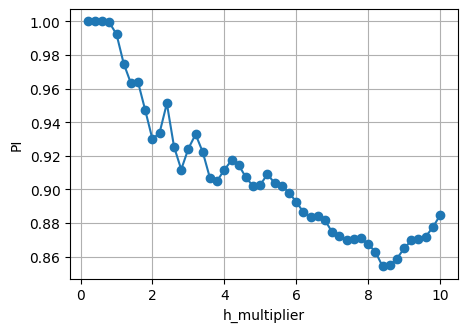

Najlepszy mnożnik h: 8.400, Wskaźnik: 0.854
----------


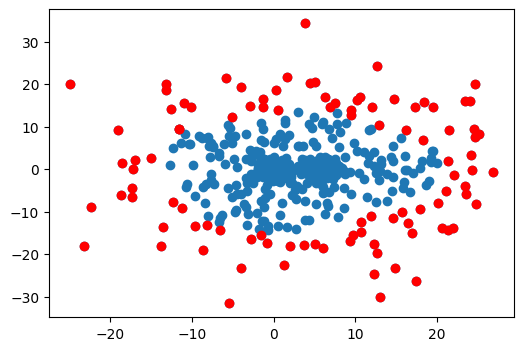

a = 0.4


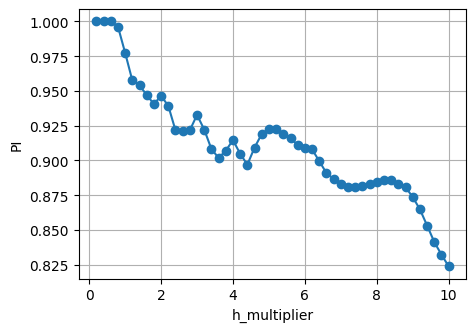

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.824
----------


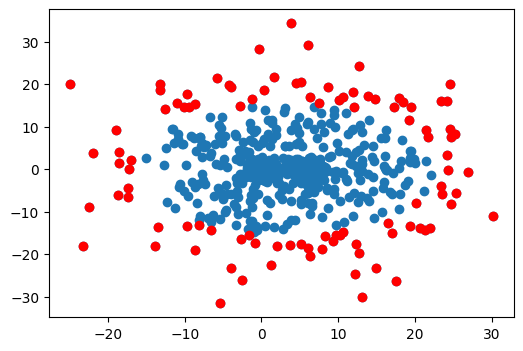

a = 0.5


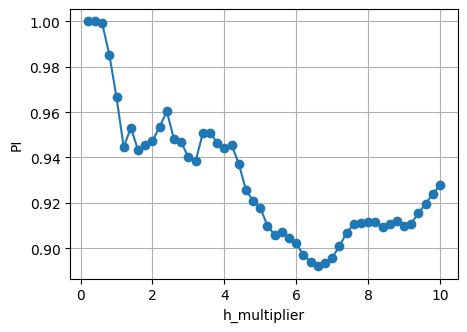

Najlepszy mnożnik h: 6.600, Wskaźnik: 0.892
----------


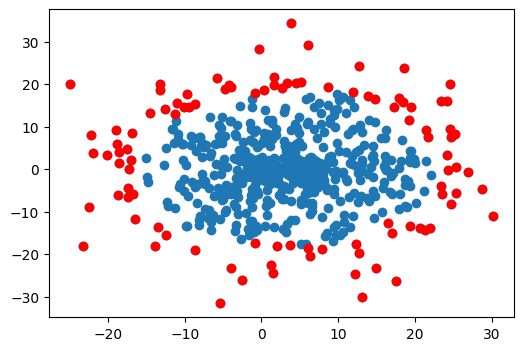

In [17]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.1
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.15)

a = 0.0


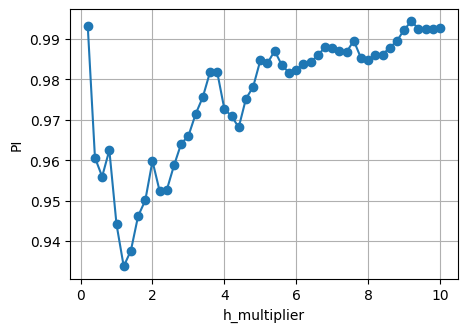

Najlepszy mnożnik h: 1.200, Wskaźnik: 0.934
----------


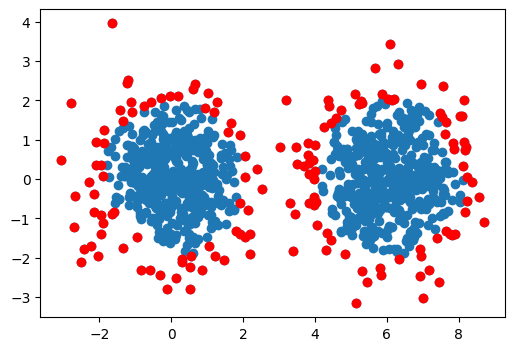

a = 0.1


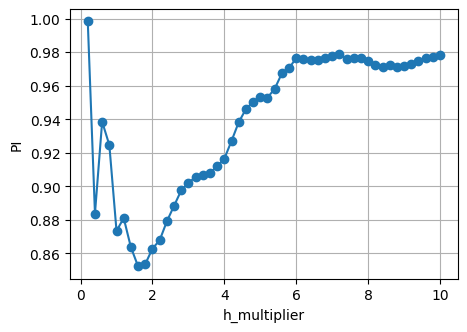

Najlepszy mnożnik h: 1.600, Wskaźnik: 0.852
----------


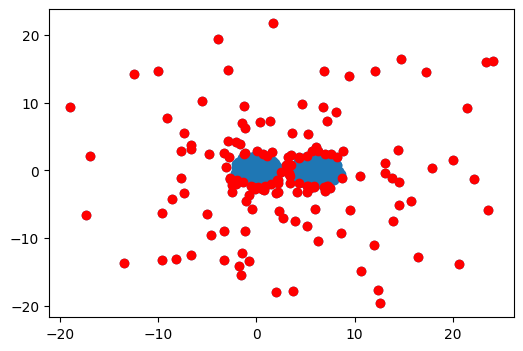

a = 0.2


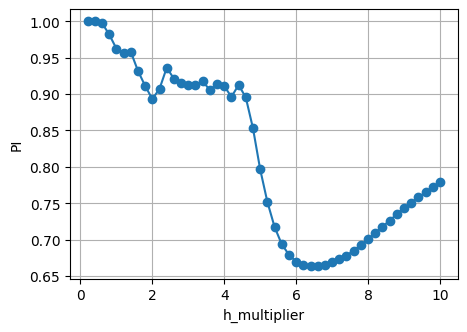

Najlepszy mnożnik h: 6.400, Wskaźnik: 0.663
----------


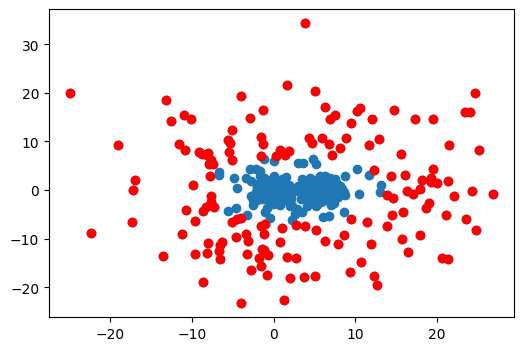

a = 0.3


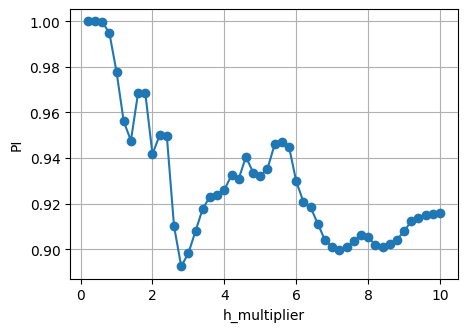

Najlepszy mnożnik h: 2.800, Wskaźnik: 0.892
----------


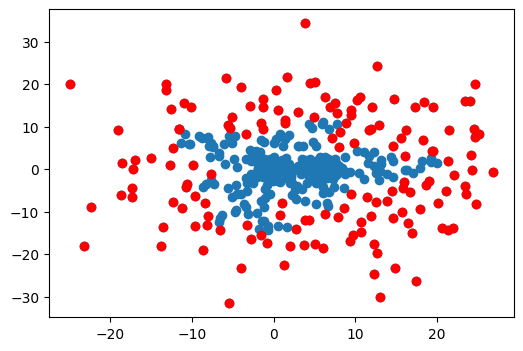

a = 0.4


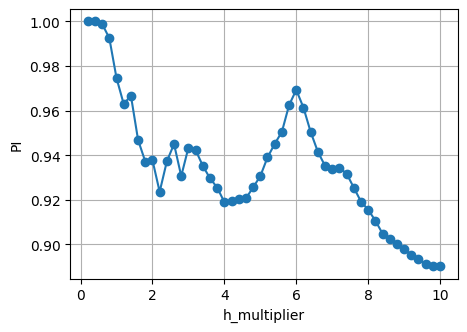

Najlepszy mnożnik h: 10.000, Wskaźnik: 0.890
----------


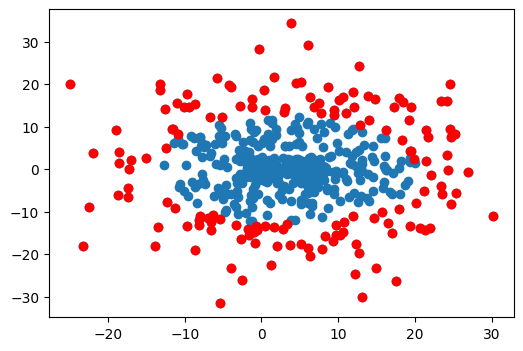

a = 0.5


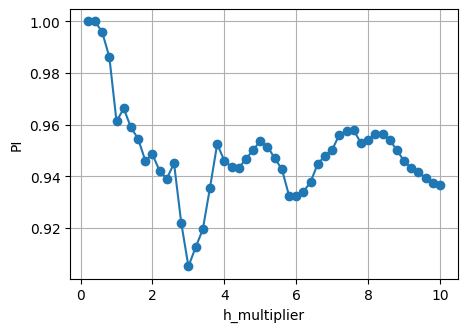

Najlepszy mnożnik h: 3.000, Wskaźnik: 0.905
----------


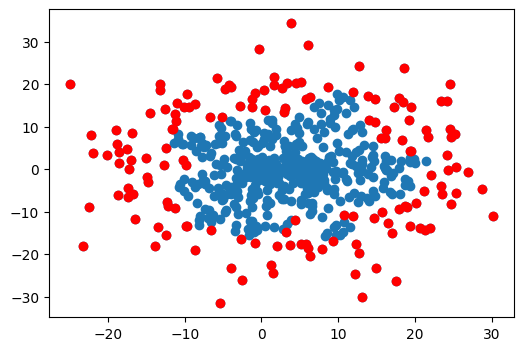

In [18]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.15
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.2)

a = 0.0


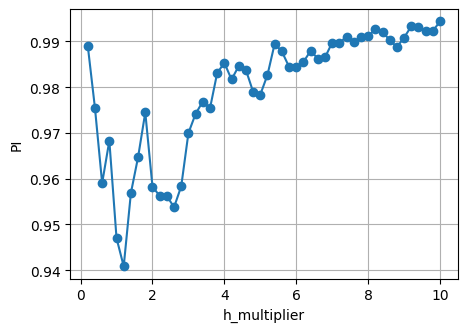

Najlepszy mnożnik h: 1.200, Wskaźnik: 0.941
----------


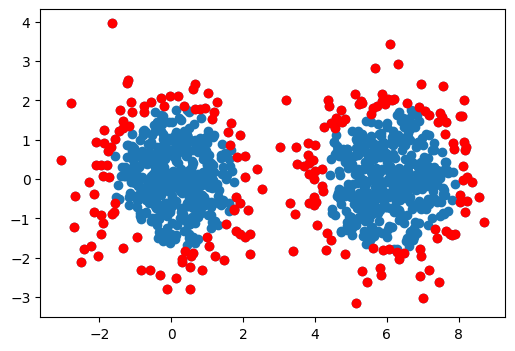

a = 0.1


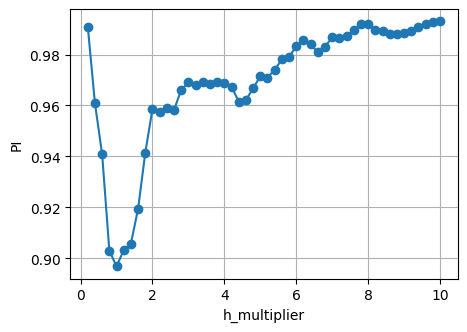

Najlepszy mnożnik h: 1.000, Wskaźnik: 0.897
----------


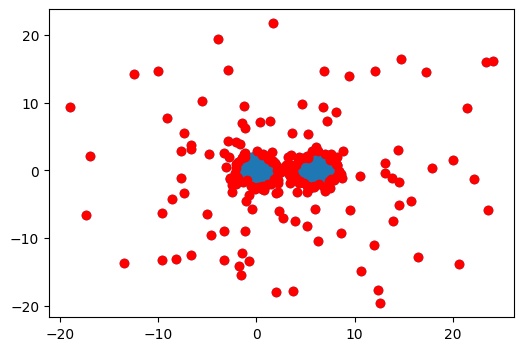

a = 0.2


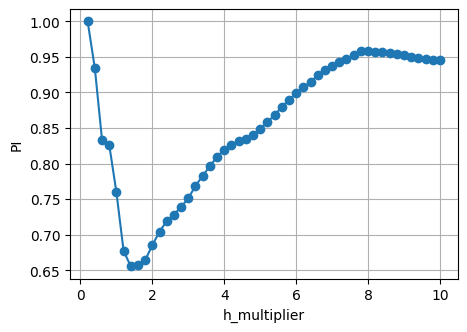

Najlepszy mnożnik h: 1.400, Wskaźnik: 0.655
----------


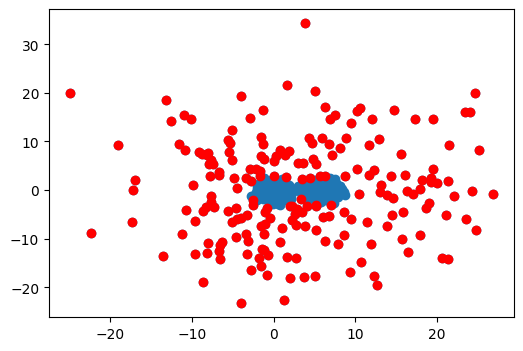

a = 0.3


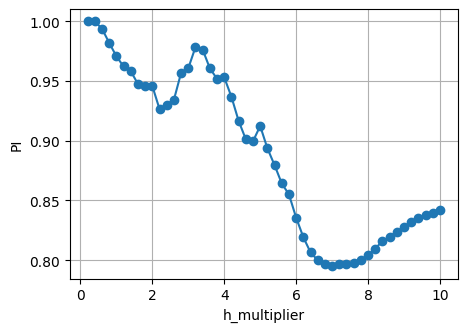

Najlepszy mnożnik h: 7.000, Wskaźnik: 0.795
----------


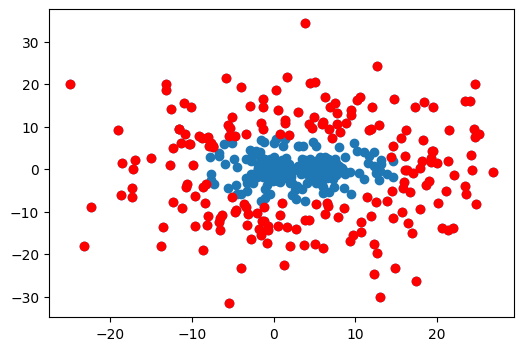

a = 0.4


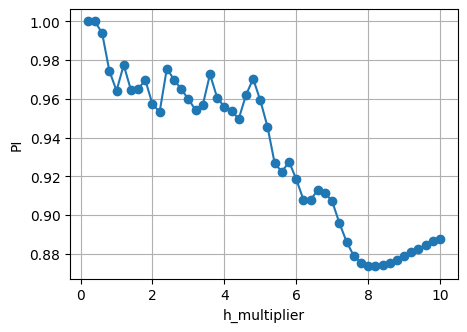

Najlepszy mnożnik h: 8.200, Wskaźnik: 0.874
----------


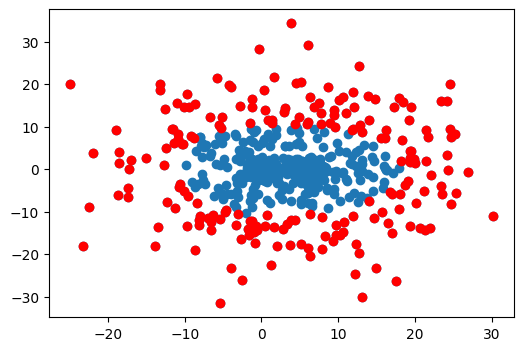

a = 0.5


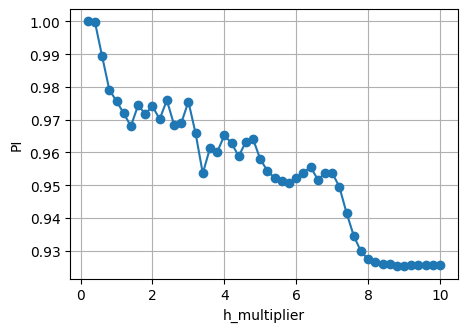

Najlepszy mnożnik h: 9.000, Wskaźnik: 0.925
----------


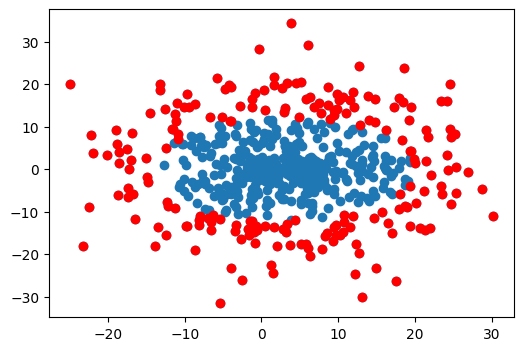

In [19]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.2
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.25)

a = 0.0


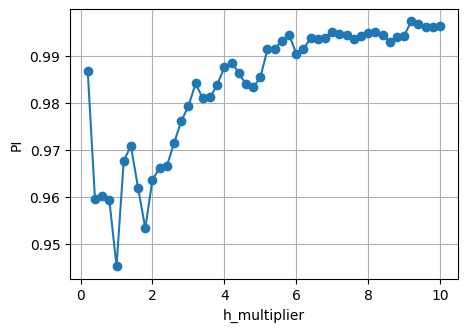

Najlepszy mnożnik h: 1.000, Wskaźnik: 0.945
----------


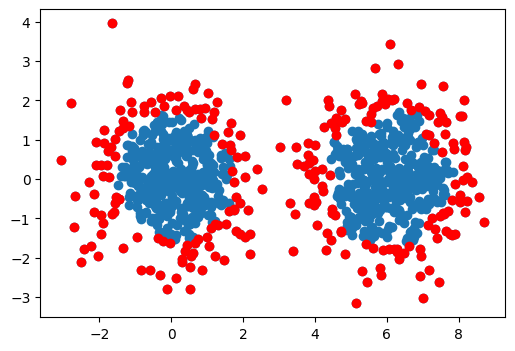

a = 0.1


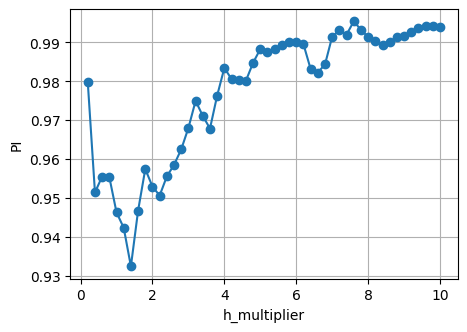

Najlepszy mnożnik h: 1.400, Wskaźnik: 0.932
----------


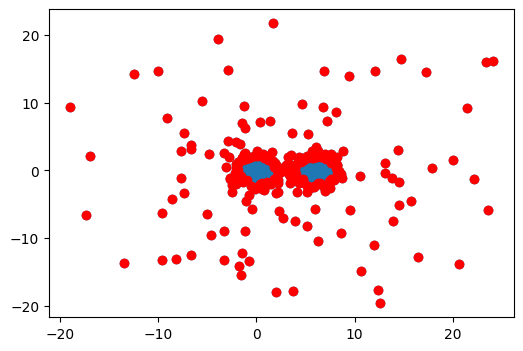

a = 0.2


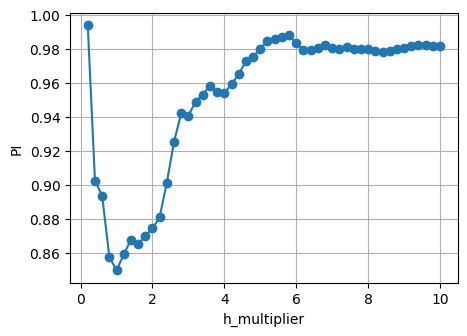

Najlepszy mnożnik h: 1.000, Wskaźnik: 0.850
----------


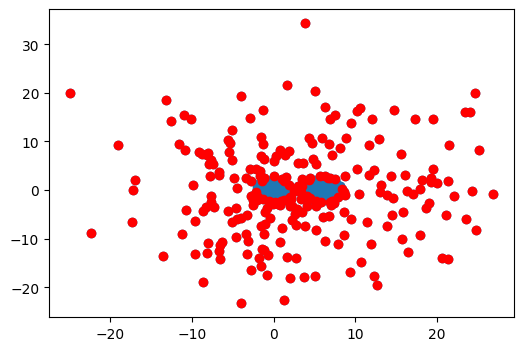

a = 0.3


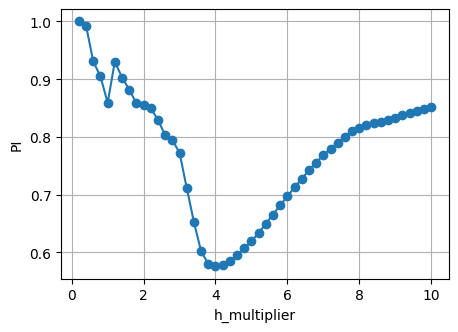

Najlepszy mnożnik h: 4.000, Wskaźnik: 0.576
----------


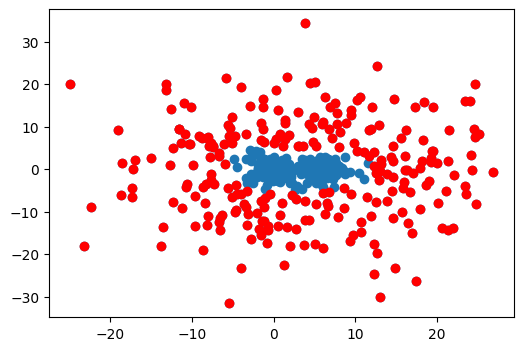

a = 0.4


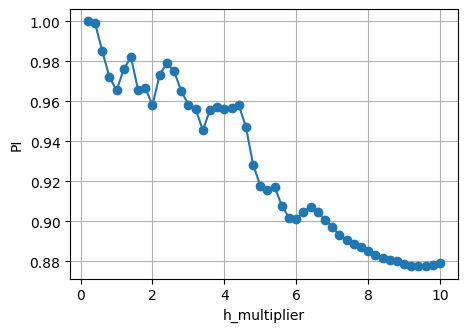

Najlepszy mnożnik h: 9.400, Wskaźnik: 0.878
----------


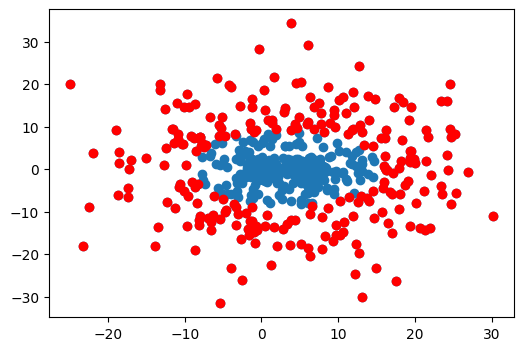

a = 0.5


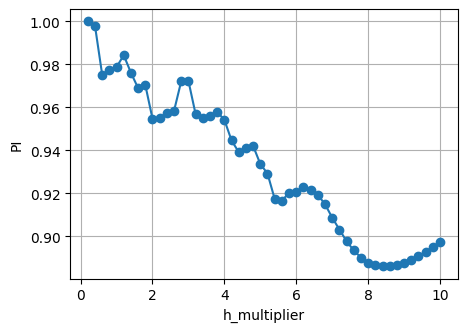

Najlepszy mnożnik h: 8.600, Wskaźnik: 0.886
----------


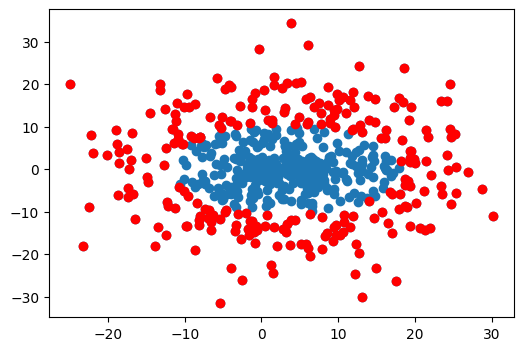

In [20]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.25
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka po mnożniku h (przy r=0.3)

a = 0.0


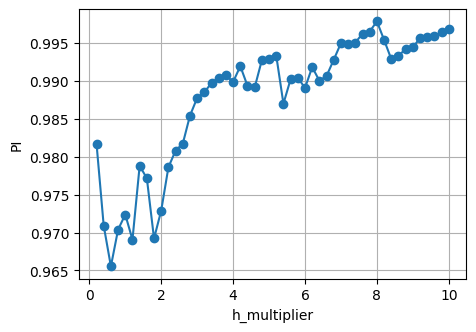

Najlepszy mnożnik h: 0.600, Wskaźnik: 0.966
----------


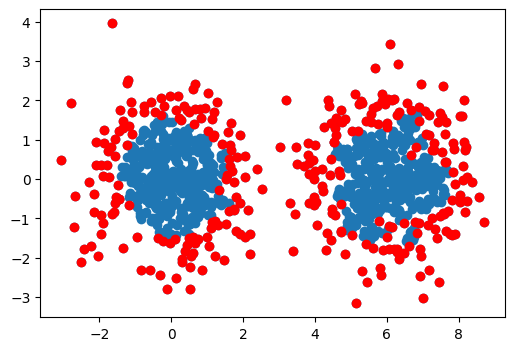

a = 0.1


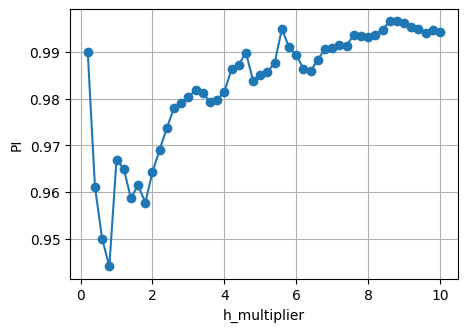

Najlepszy mnożnik h: 0.800, Wskaźnik: 0.944
----------


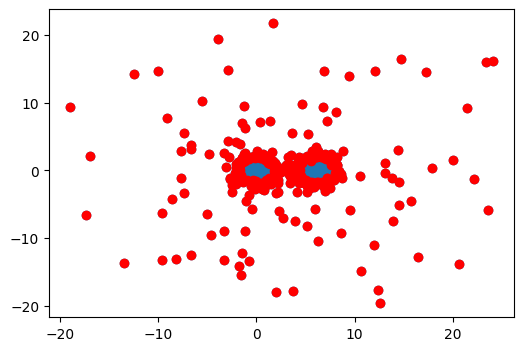

a = 0.2


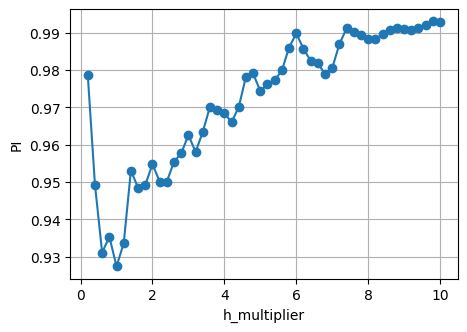

Najlepszy mnożnik h: 1.000, Wskaźnik: 0.927
----------


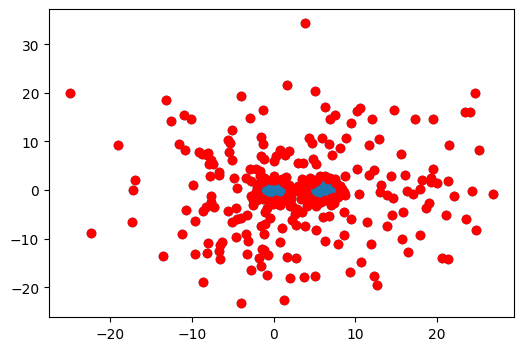

a = 0.3


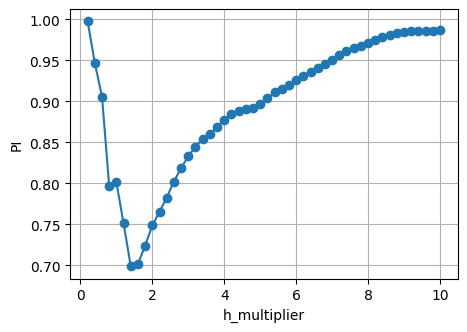

Najlepszy mnożnik h: 1.400, Wskaźnik: 0.699
----------


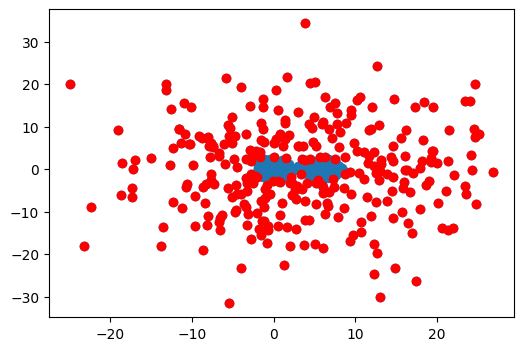

a = 0.4


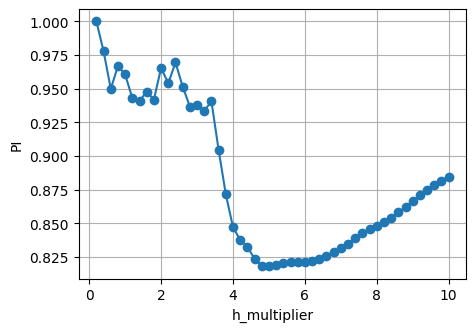

Najlepszy mnożnik h: 5.000, Wskaźnik: 0.818
----------


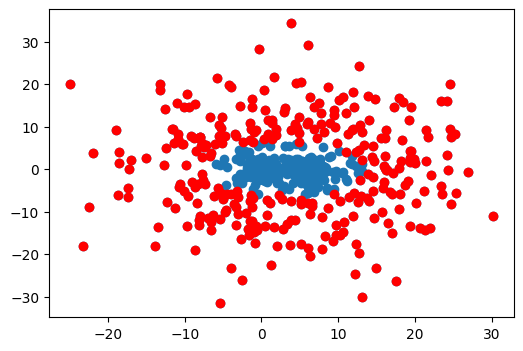

a = 0.5


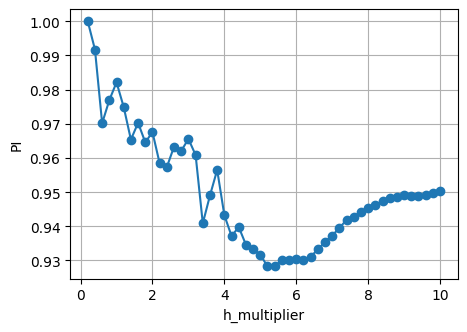

Najlepszy mnożnik h: 5.400, Wskaźnik: 0.928
----------


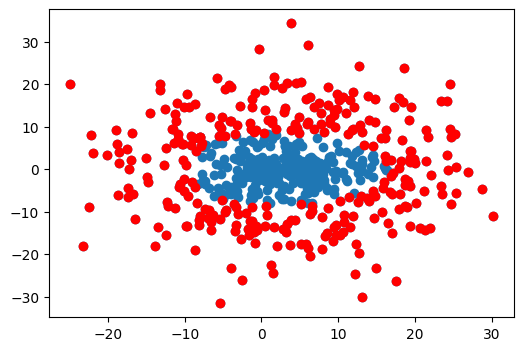

In [21]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    r = 0.3
    global_min, _ = func2(x_train, r)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, r)
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(6, 4))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()

\newpage

# Siatka dwuwymiarowa po r i mnożniku h

In [22]:
def func3(x_train):
    bandwidth = direct_plugin(x_train, stage=2)

    metrics_list = []
    h_mul_list = []
    r_list = []
    for h_mul in np.arange(0.2, 10.2, 0.2):
        h_mul = round(h_mul, 3)
        
        for r in np.arange(0.01, 0.51, 0.01):
            r = round(r, 3)
        
            kde = KDE().fit(x_train, bandwidth=bandwidth * h_mul)
            scores = kde.pdf(x_train)
            threshold = np.quantile(scores, r)
            labels_pred = np.where(scores <= threshold, 1, 0)

            n_outliers = labels_pred.sum()
            if n_outliers == 0:
                continue

            scores_o = scores[labels_pred==1]
            scores_i = scores[labels_pred==0]
            tmp = int(np.ceil(0.01 * (scores_o.size + scores_i.size)))
            metrics = np.sum(np.sort(scores_o)[-tmp:]) / np.sum(np.sort(scores_i)[:tmp])

            metrics_list.append(metrics)
            h_mul_list.append(h_mul)
            r_list.append(r)

    # Find minima
    idx = np.argmin(metrics_list)
    global_min = (metrics_list[idx], h_mul_list[idx], r_list[idx])
    
    print(f"Najlepszy mnożnik h: {global_min[1]:.3f}, r: {global_min[2]}, Wskaźnik: {global_min[0]:.3f}")
    
    return global_min, scores

a = 0.0
Najlepszy mnożnik h: 1.800, r: 0.01, Wskaźnik: 0.486


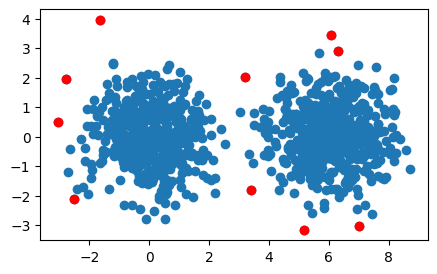

--------------------
a = 0.1
Najlepszy mnożnik h: 4.800, r: 0.08, Wskaźnik: 0.170


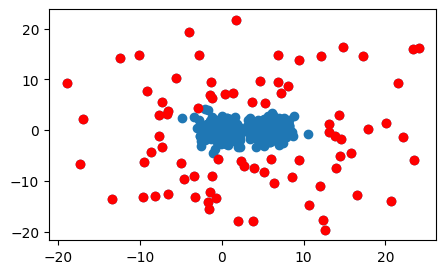

--------------------
a = 0.2
Najlepszy mnożnik h: 4.400, r: 0.17, Wskaźnik: 0.355


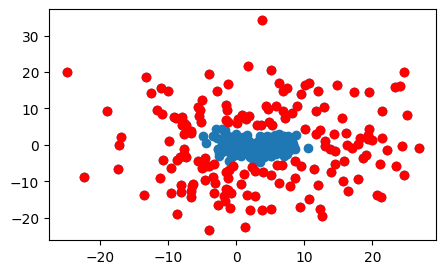

--------------------
a = 0.3
Najlepszy mnożnik h: 10.000, r: 0.01, Wskaźnik: 0.461


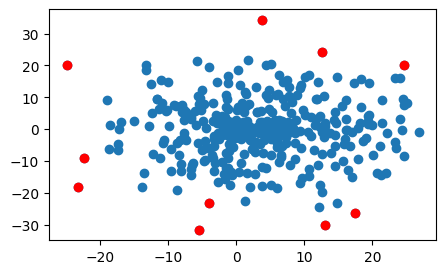

--------------------
a = 0.4
Najlepszy mnożnik h: 10.000, r: 0.01, Wskaźnik: 0.432


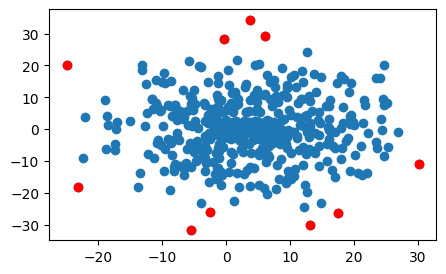

--------------------
a = 0.5
Najlepszy mnożnik h: 10.000, r: 0.01, Wskaźnik: 0.427


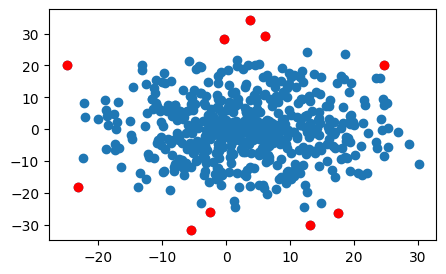

--------------------


In [23]:
for a in np.arange(0.0, 0.6, 0.1):
    print(f"a = {round(a, 2)}")
    np.random.seed(1)

    # Data
    m_train = 1000
    mean1 = [0, 0]
    cov1 = [[1, 0], [0, 1]]
    m_train1 = int((1 - a) / 2 * m_train)
    x_train1 = np.random.multivariate_normal(mean1, cov1, size=m_train1)
    mean2 = [6, 0]
    cov2 = [[1, 0], [0, 1]]
    m_train2 = int((1 - a) / 2 * m_train)
    x_train2 = np.random.multivariate_normal(mean2, cov2, size=m_train2)
    mean3 = [3, 0]
    cov3 = [[100, 0], [0, 100]]
    m_train3 = int(a * m_train)
    x_train3 = np.random.multivariate_normal(mean3, cov3, size=m_train3)
    x_train = np.concatenate((x_train1, x_train2, x_train3))

    # Run
    global_min, _ = func3(x_train)

    bandwidth = direct_plugin(x_train, stage=2)
    kde = KDE().fit(x_train, bandwidth=bandwidth * global_min[1])
    scores = kde.pdf(x_train)

    threshold = np.quantile(scores, global_min[2])
    labels_pred = np.where(scores <= threshold, 1, 0)

    plt.figure(figsize=(5, 3))
    plt.scatter(x_train[:,0], x_train[:,1])
    plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,1], c="r")
    # plt.xlim(-4, 10)
    # plt.ylim(-4, 4)
    plt.show()
    
    print("-"*20)